In [1]:
import pandas as pd
import numpy as np

## EDA and Pre-processing

### Data Exploration

In [2]:
# This dataset is too large for GitHub so used local path here (Need to replace the path here if want to run)
df = pd.read_csv("/Users/zy/Downloads/fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
df.describe()
# There are 4 numerical values that we could consider removing since it is not relevant to our text classfication

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


First, we dropped columns that are not relevant to this project such as identification information and some numerical columns.

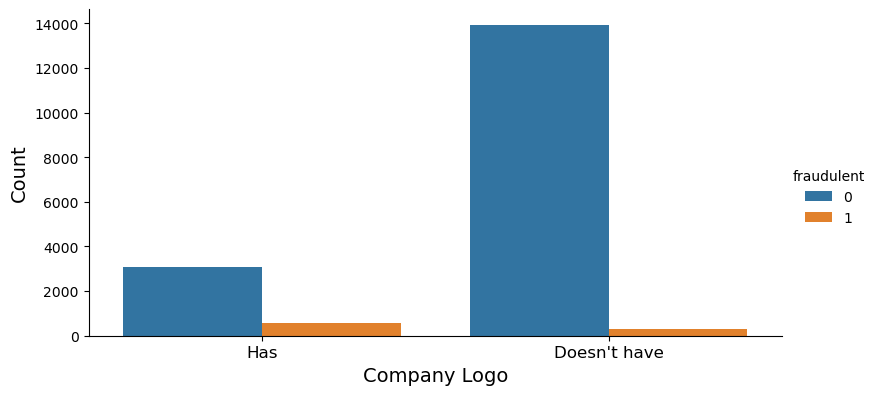

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="has_company_logo", hue="fraudulent", data=df, kind="count", aspect=2, height=4);

plt.xlabel("Company Logo", fontsize=14)
plt.xticks([0, 1], ("Has", "Doesn't have"), fontsize=12)
plt.ylabel("Count", fontsize=14);

The post being either real or fake, the majority of the job posts collected in this dataset do not have a company logo. This suggests that not having a logo is not a determining factor.

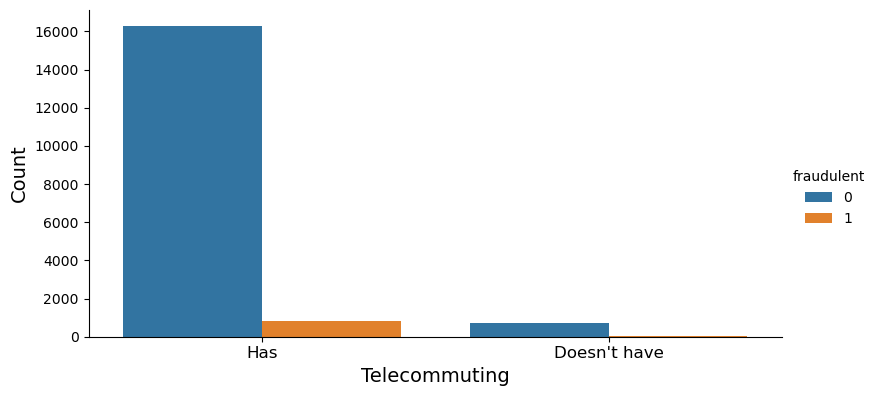

In [5]:
sns.catplot(x="telecommuting", hue="fraudulent", data=df, kind="count", aspect=2, height=4);

plt.xlabel("Telecommuting", fontsize=14)
plt.xticks([0, 1], ("Has", "Doesn't have"), fontsize=12)
plt.ylabel("Count", fontsize=14);

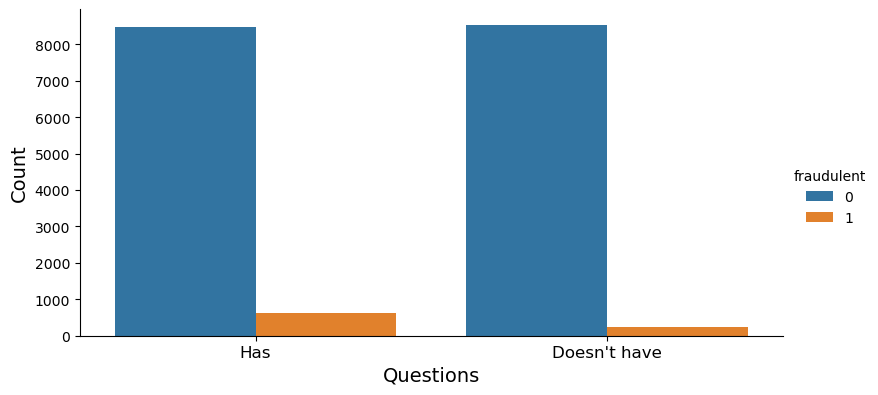

In [6]:
sns.catplot(x="has_questions", hue="fraudulent", data=df, kind="count", aspect=2, height=4);

plt.xlabel("Questions", fontsize=14)
plt.xticks([0, 1], ("Has", "Doesn't have"), fontsize=12)
plt.ylabel("Count", fontsize=14);

The similar reasons apply to the other two binary columns telecommuting and has_questions, and therefore and could remove those columns safely.

In [7]:
columns_to_drop = ['job_id', 'department', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']
df.drop(columns=columns_to_drop, inplace=True)

Here we check the distribution of fake and real job posts in our dataset, and we found that it is a little imbalanced in favor of the classes. Therefore, finding the characteristics (the most frequent words appearing) of a fake job posting would be not as accurate as we would expect as it only have 866 rows.

In [8]:
df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

,fraudulent,title
0,0,17014
1,1,866


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            17880 non-null  object
 1   location         17534 non-null  object
 2   company_profile  14572 non-null  object
 3   description      17879 non-null  object
 4   requirements     15185 non-null  object
 5   benefits         10670 non-null  object
 6   industry         12977 non-null  object
 7   function         11425 non-null  object
 8   fraudulent       17880 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


As for this project, we will focus on rows that contains all the text columns (company_profile, description, requirements, and benefits), and we also want to compare the results between different inductries. Therefore, we will filter the dataset by drooping rows that have missing values for all these columns (which only reducing by 1 row here in the dataset).

In [10]:
# Drop rows with missing values in specified columns
columns_to_check = ['company_profile', 'description', 'requirements', 'benefits', 'industry']
df.dropna(subset=columns_to_check, how='all', inplace=True)

df

,title,location,company_profile,description,requirements,benefits,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,Graphic Design,Design,0


Here we check if we could potentially use industry as a category to analysis insights in terms of the fake job posting characteristics, however, since we found that there were not many fake job posts in each industry (some industry does not have fake posts at all), grouping by industry will not add much value to our project.

In [11]:
# Group by 'industry' and count the number of rows in each group
industry_counts = df.groupby('industry').size()

# Print the number of rows in each industry
print(industry_counts)

industry
Accounting                        159
Airlines/Aviation                  63
Alternative Dispute Resolution      1
Animation                           5
Apparel & Fashion                  97
                                 ... 
Warehousing                        51
Wholesale                          11
Wine and Spirits                    1
Wireless                            4
Writing and Editing                19
Length: 131, dtype: int64


In [12]:
# Filter the DataFrame by rows where 'fraudulent' is equal to 1
fraudulent_df = df[df['fraudulent'] == 1]

# Group by 'industry' and count the number of rows in each group
fraudulent_industry_counts = fraudulent_df.groupby('industry').size()

# Print the number of fraudulent rows in each industry
print(fraudulent_industry_counts)


industry
Accounting                          57
Airlines/Aviation                    1
Animation                            2
Apparel & Fashion                    2
Automotive                           5
                                    ..
Telecommunications                  26
Transportation/Trucking/Railroad     3
Utilities                            1
Warehousing                          1
Wholesale                            1
Length: 62, dtype: int64


In [13]:
# Store the filtered dataset as CSV file for later usage
df.to_csv("Filtered_Fake_Jobs.csv", index = False)

### Data Cleaning

In [55]:
post = pd.read_csv("Filtered_Fake_Jobs.csv")
post.head()

,title,location,company_profile,description,requirements,benefits,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Hospital & Health Care,Health Care Provider,0


In [56]:
import re

# Define a function to clean text
def clean_text(text):
    if isinstance(text, str):
        # Remove newline characters
        text = text.replace('\n', '')
        text = text.replace('\r', '')
        text = text.replace('\t', '')

        # Remove unwanted characters and punctuation marks
        text = re.sub(r'[0-9]', '', text)
        text = re.sub(r'[^\w\s]', '', text)  # Remove all punctuation marks
        text = text.replace('  ', ' ')
    return text

# Apply cleaning for each column
for col in ['company_profile', 'description', 'requirements', 'benefits']:
    post[col] = post[col].apply(clean_text)

    # Convert all upper case to lower case
    post[col] = post[col].apply(lambda s: s.lower() if isinstance(s, str) else s)

In [57]:
post.head()

,title,location,company_profile,description,requirements,benefits,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",were food and weve created a groundbreaking an...,food a fastgrowing james beard awardwinning on...,experience with content management systems a m...,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",seconds the worlds cloud video production ser...,organised focused vibrant awesomedo you have a...,what we expect from youyour key responsibility...,what you will get from usthrough being part of...,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",valor services provides workforce solutions th...,our client located in houston is actively seek...,implement precommissioning and commissioning p...,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",our passion for improving quality of life thro...,the company esri environmental systems researc...,education bachelors or masters in gis business...,our culture is anything but corporatewe have a...,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualificationsrn license in the state of texas...,full benefits offered,Hospital & Health Care,Health Care Provider,0


### Tokenization

In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/zy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/zy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to clean, tokenize, and lemmatize text
def tokenize(text):
    if isinstance(text, str):
        # Remove unwanted characters and punctuation marks
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()  # Convert to lowercase
        tokens = text.split()  # Tokenize by splitting on whitespace
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [token for token in tokens if token not in stop_words]
        
        # Lemmatize tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
        
        return lemmatized_tokens
    else:
        return []

In [62]:
# Apply tokenization for each column
for col in ['company_profile', 'description', 'requirements', 'benefits']:
    new_col_name = col + '_tokens'
    post[new_col_name] = post[col].apply(lambda x: tokenize(x))

In [64]:
post.head()

,title,location,company_profile,description,requirements,benefits,industry,function,fraudulent,company_profile_tokens,description_tokens,requirements_tokens,benefits_tokens
0,Marketing Intern,"US, NY, New York",were food and weve created a groundbreaking an...,food a fastgrowing james beard awardwinning on...,experience with content management systems a m...,NaN,NaN,Marketing,0,"[food, weve, created, groundbreaking, awardwin...","[food, fastgrowing, james, beard, awardwinning...","[experience, content, management, system, majo...",[]
1,Customer Service - Cloud Video Production,"NZ, , Auckland",seconds the worlds cloud video production ser...,organised focused vibrant awesomedo you have a...,what we expect from youyour key responsibility...,what you will get from usthrough being part of...,Marketing and Advertising,Customer Service,0,"[second, world, cloud, video, production, serv...","[organised, focused, vibrant, awesomedo, passi...","[expect, youyour, key, responsibility, communi...","[get, usthrough, part, second, team, gainexper..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",valor services provides workforce solutions th...,our client located in houston is actively seek...,implement precommissioning and commissioning p...,NaN,NaN,NaN,0,"[valor, service, provides, workforce, solution...","[client, located, houston, actively, seeking, ...","[implement, precommissioning, commissioning, p...",[]
3,Account Executive - Washington DC,"US, DC, Washington",our passion for improving quality of life thro...,the company esri environmental systems researc...,education bachelors or masters in gis business...,our culture is anything but corporatewe have a...,Computer Software,Sales,0,"[passion, improving, quality, life, geography,...","[company, esri, environmental, system, researc...","[education, bachelor, master, gi, business, ad...","[culture, anything, corporatewe, collaborative..."
4,Bill Review Manager,"US, FL, Fort Worth",spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,qualificationsrn license in the state of texas...,full benefits offered,Hospital & Health Care,Health Care Provider,0,"[spotsource, solution, llc, global, human, cap...","[job, title, itemization, review, managerlocat...","[qualificationsrn, license, state, texasdiplom...","[full, benefit, offered]"


### Count the Frequency

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Filter DataFrame to include only rows where 'fraudulent' is equal to 1 and drop rows with NaN values in selected columns
text_cols = ['company_profile', 'description', 'requirements', 'benefits']
fake_df = post[post['fraudulent'] == 1].dropna(subset=text_cols)

# Initialize an empty DataFrame to store top words for each text column
fake_top_words_df = pd.DataFrame()

# Count the frequency of words for each text column separately
for col in text_cols:
    # Vectorize text using CountVectorizer
    vectorizer = CountVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
    X = vectorizer.fit_transform(fake_df[col])
    words = vectorizer.get_feature_names_out()
    col_word_counts = pd.DataFrame(X.toarray(), columns=words)
    
    # Find the top 10 most frequent words for the current column
    top_words = col_word_counts.sum().nlargest(10)
    fake_top_words_df[col] = top_words.index

/Users/zy/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zy/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zy/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zy/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [68]:
fake_top_words_df

,company_profile,description,requirements,benefits
0,service,product,experience,benefit
1,candidate,work,skill,company
2,bonus,customer,ability,employee
3,business,team,work,environment
4,client,project,year,customer
5,recruiting,service,product,team
6,product,system,knowledge,competitive
7,company,engineering,team,opportunity
8,technology,position,communication,package
9,solution,business,engineering,event


In [69]:
# Filter DataFrame to include only rows where 'fraudulent' is equal to 0 and drop rows with NaN values in selected columns
real_df = post[post['fraudulent'] == 0].dropna(subset=text_cols)

# Initialize an empty DataFrame to store top words for each text column
real_top_words_df = pd.DataFrame()

# Count the frequency of words for each text column separately
for col in text_cols:
    # Vectorize text using CountVectorizer
    vectorizer = CountVectorizer(tokenizer=tokenize, ngram_range=(1, 2))
    X = vectorizer.fit_transform(real_df[col])
    words = vectorizer.get_feature_names_out()
    col_word_counts = pd.DataFrame(X.toarray(), columns=words)
    
    # Find the top 10 most frequent words for the current column
    top_words = col_word_counts.sum().nlargest(10)
    real_top_words_df[col] = top_words.index

real_top_words_df

/Users/zy/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zy/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zy/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/zy/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,company_profile,description,requirements,benefits
0,company,team,experience,work
1,team,customer,skill,benefit
2,service,work,year,company
3,work,company,work,opportunity
4,people,product,ability,competitive
5,business,business,communication,team
6,customer,service,knowledge,salary
7,amp,client,degree,offer
8,technology,sale,team,paid
9,help,new,required,amp


### Lift Ratio

In [74]:
# Function to calculate lift ratio between top words of two columns
def calculate_lift_top_words(column1, column2):
    top_words_col1 = set(fake_top_words_df[column1])
    top_words_col2 = set(fake_top_words_df[column2])
    co_occur_freq = sum(post[column1].dropna().apply(lambda x: any(word in x for word in top_words_col2)))
    freq_col1 = sum(post[column1].dropna().apply(lambda x: any(word in x for word in top_words_col1)))
    freq_col2 = sum(post[column2].dropna().apply(lambda x: any(word in x for word in top_words_col2)))
    
    # Calculate lift ratio
    lift = (len(post) * co_occur_freq) / (freq_col1 * freq_col2)
    return lift

# Define selected text columns
text_cols = ['company_profile', 'description', 'requirements', 'benefits']

# Calculate lift ratio for each pair of selected text columns based on top words
lift_ratios_top_words = pd.DataFrame(np.zeros((len(text_cols), len(text_cols))), columns=text_cols, index=text_cols)
for i, col1 in enumerate(text_cols):
    for j, col2 in enumerate(text_cols):
        if i != j:
            lift_ratios_top_words.at[col1, col2] = calculate_lift_top_words(col1, col2)

In [75]:
lift_ratios_top_words

,company_profile,description,requirements,benefits
company_profile,0.000000,1.129563,1.170346,1.959494
description,1.357335,0.000000,1.206143,2.058596
requirements,0.946306,0.920602,0.000000,1.384322
benefits,0.954062,0.855563,1.042937,0.000000


### MDS

/Users/zy/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


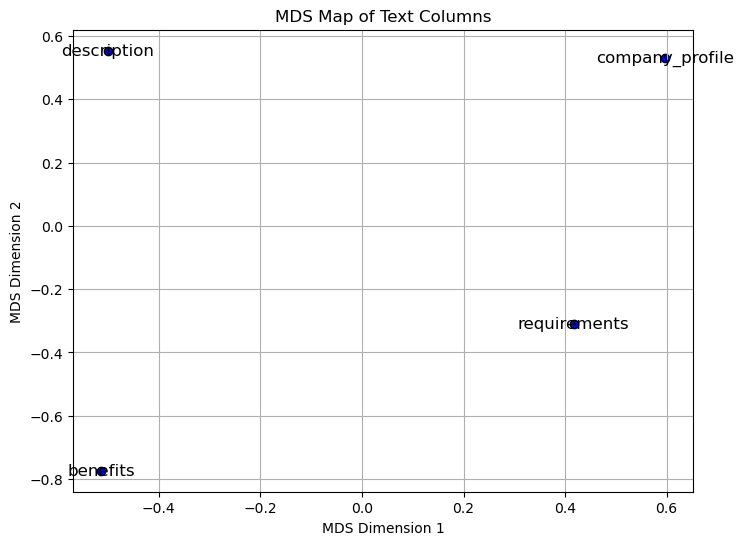

In [78]:
from sklearn.manifold import MDS

# Calculate the average of lift ratios for pairs of text columns to ensure symmetry
lift_ratios_top_words_symmetric = (lift_ratios_top_words + lift_ratios_top_words.T) / 2

# Initialize and fit MDS model
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coordinates = mds.fit_transform(lift_ratios_top_words_symmetric)

# Plot MDS map
plt.figure(figsize=(8, 6))
plt.scatter(mds_coordinates[:, 0], mds_coordinates[:, 1], c='blue', edgecolor='k')
for i, label in enumerate(text_cols):
    plt.text(mds_coordinates[i, 0], mds_coordinates[i, 1], label, fontsize=12, ha='center', va='center')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Map of Text Columns')
plt.grid(True)
plt.show()